In [3]:
import pandas as pd

with open('col_10k.txt', 'r', encoding='utf-8') as file:
    data=file.readlines()
data[:2]

['2, 1, \n', '3, 10, 5, 16, 8, 4, 2, 1, \n']

In [4]:
col_nums=list(map(lambda line : line[:-3].split(","),data))
col_nums[:2]

[['2', ' 1'], ['3', ' 10', ' 5', ' 16', ' 8', ' 4', ' 2', ' 1']]

In [5]:
col_nums=list(map(lambda line : list(map(lambda x : int(x), line)),col_nums))
col_nums[:2]

[[2, 1], [3, 10, 5, 16, 8, 4, 2, 1]]

In [6]:
type(col_nums[-1][1])

int

In [7]:
from math import sin,cos,pi
def nums_to_point(num):
    x_points=[0]
    y_points=[0] 
    dir=0
    index=1
    for n in num[1:]:
        if n%2==0: 
            dir+=(pi/3)*2
            x_points.append(x_points[index-1]+sin(dir))
            y_points.append(y_points[index-1]+cos(dir))
        else:
            dir-=(pi/3)*2
            x_points.append(x_points[index-1]+sin(dir))
            y_points.append(y_points[index-1]+cos(dir))
        index+=1
    return x_points,y_points


In [8]:
x_points,y_points=nums_to_point(col_nums[27])

In [9]:
points=[]
for line in col_nums:
    points.append(nums_to_point(line))

In [10]:
points_1k=[] #그래프 그리는 시간 오래 걸려서 1000개만 만들기
for line in col_nums[:1000]:
    points_1k.append(nums_to_point(line))

In [11]:
print(x_points)
print(y_points)
points[:1]

[0, 0.8660254037844387, 3.3306690738754696e-16, 8.813754755807632e-17, -0.8660254037844387, -0.8660254037844389, -1.7320508075688776, -1.7320508075688779, -0.8660254037844387, -0.8660254037844389, 2.220446049250313e-16, -0.8660254037844376, -0.8660254037844398, -1.7320508075688776, -1.7320508075688799, -0.8660254037844397, -1.7320508075688774, -1.732050807568878, -2.598076211353316]
[0, -0.49999999999999983, -1.0000000000000002, -2.220446049250313e-16, -0.49999999999999983, 0.5000000000000002, 6.106226635438361e-16, 1.0000000000000007, 0.5000000000000014, 1.5000000000000013, 1.0000000000000022, 0.5000000000000009, 1.5000000000000009, 0.9999999999999996, 1.9999999999999996, 1.5000000000000022, 1.0000000000000007, 2.000000000000001, 1.4999999999999993]


[([0, -0.8660254037844387], [0, -0.49999999999999983])]

<Figure size 640x480 with 0 Axes>

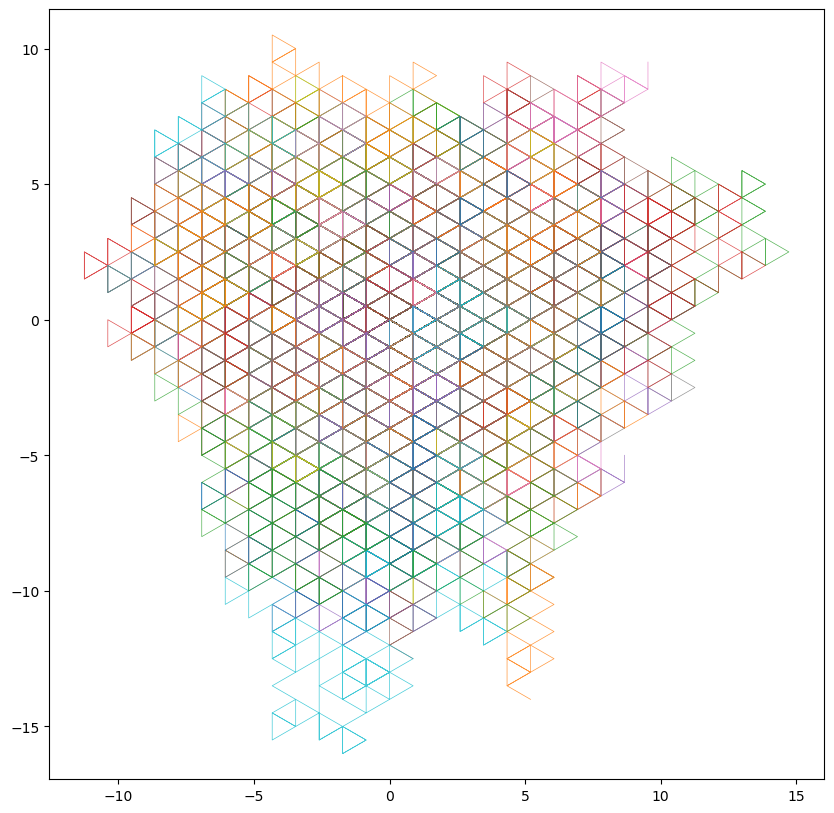

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
plt.clf() 
plt.figure(figsize=(10, 10))
for i in points_1k:
    color=cm.tab10(np.random.rand())
    plt.plot(i[0],i[1],color=color,linewidth=0.5,alpha=0.8)
    plt.axis([1, 1000000, 1, 1000000])
    plt.axis("equal")
plt.savefig("graph/1k_60ngle.svg")
plt.savefig("graph/1k_60angle.png")
plt.show()